## PATTERN AND INDICATOR MASTERY

In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

%matplotlib inline

In [58]:
stock='ADANIENT.NS'
data=yf.download(stock,"2018-04-01","2023-03-31")

[*********************100%***********************]  1 of 1 completed


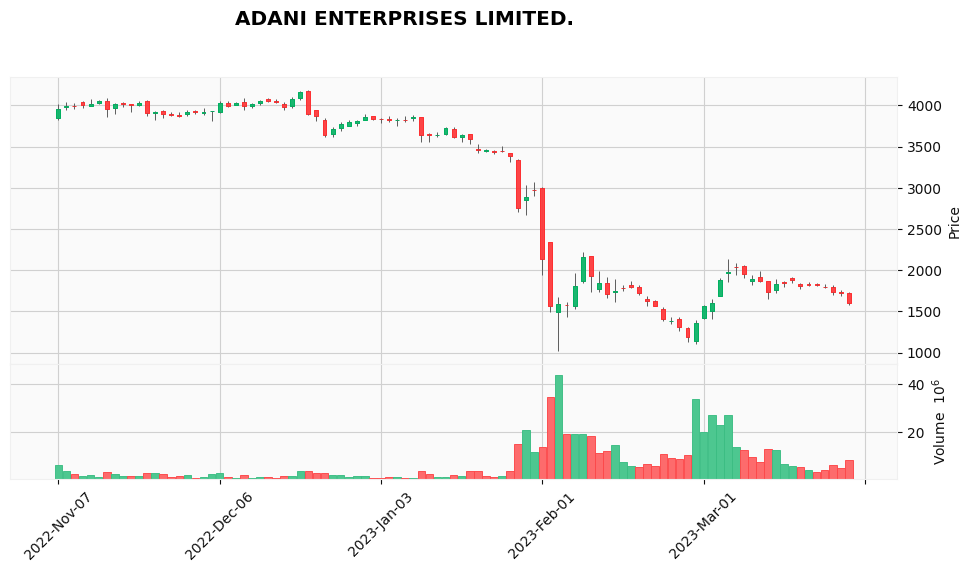

In [59]:
mpf.plot(data[-100:-1], type='candle', volume=True, figratio=(15, 7), style='yahoo', title='ADANI ENTERPRISES LIMITED.')

In [60]:
def calculate_rsi(data, window=14):
    price_change = data.diff(1)

    up_prices = price_change.where(price_change > 0, 0)
    down_prices = price_change.where(price_change < 0, 0)

    avg_gain = up_prices.rolling(window).mean()
    avg_loss = down_prices.abs().rolling(window).mean()

    rsi = 100 - (100 / (1 + (avg_gain/avg_loss)))
    return rsi
rsi_values = calculate_rsi(data['Close'])
print(rsi_values)

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-04          NaN
2018-04-05          NaN
2018-04-06          NaN
                ...    
2023-03-23    59.400007
2023-03-24    41.035579
2023-03-27    31.133386
2023-03-28    20.905725
2023-03-29    36.820919
Name: Close, Length: 1237, dtype: float64


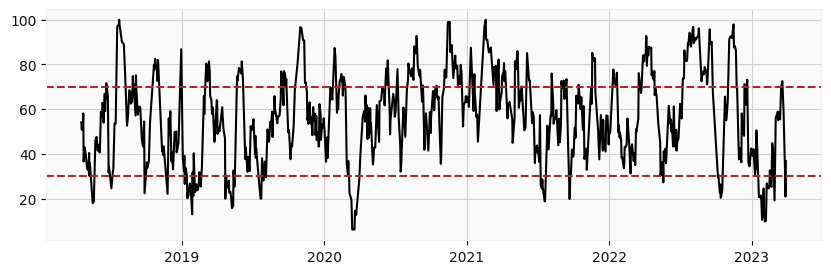

In [61]:
plt.figure(figsize=(10, 3))
plt.plot(rsi_values,color='black')
plt.axhline(y = 30, color = 'brown', linestyle = '--')
plt.axhline(y = 70, color = 'brown', linestyle = '--')

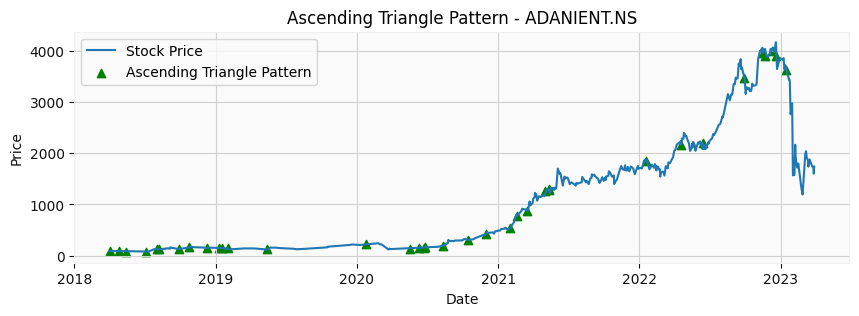

In [62]:
data['asc_Resistance'] = data['High'].rolling(window=3).max()
data['asc_Support'] = data['Low'].rolling(window=3).min()

# Identify the days where the pattern is present
ascending_triangle_days = data[(data['High'] >= data['asc_Resistance']) & (data['Low'] <= data['asc_Support'])]

# Plot the ascending triangle pattern
plt.figure(figsize=(10, 3))
plt.plot(data.index, data['Close'], label='Stock Price')
plt.scatter(ascending_triangle_days.index, ascending_triangle_days['Close'], marker="^",color='green', label='Ascending Triangle Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Ascending Triangle Pattern - {stock}')
plt.legend()
plt.show()


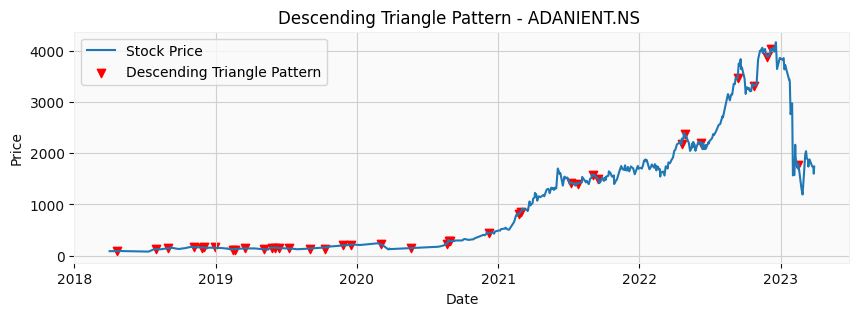

In [63]:
data['des_Resistance'] = data['High'].rolling(window=3).min()
data['des_Support'] = data['Low'].rolling(window=3).max()

descending_triangle_days = data[(data['High'] <= data['des_Resistance']) & (data['Low'] >= data['des_Support'])]
plt.figure(figsize=(10, 3))
plt.plot(data.index, data['Close'], label='Stock Price')
plt.scatter(descending_triangle_days.index, descending_triangle_days['Close'], marker="v",color='red', label='Descending Triangle Pattern')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Descending Triangle Pattern - {stock} ')
plt.legend()
plt.show()

In [64]:
ascending_triangles=[]
descending_triangles=[]
candlestick_signals=[]

candlestick_status=''
for i in range(len(data)):
    if ((data['High'][i] >= data['asc_Resistance'][i]) & (data['Low'][i] <= data['asc_Support'][i])) and candlestick_status!='BUY':
        ascending_triangles.append(i)
        candlestick_signals.append((i,'BUY'))
        candlestick_status = 'BUY'
    if ((data['High'][i] <= data['des_Resistance'][i]) & (data['Low'][i] >= data['des_Support'][i])) and candlestick_status!='SELL':
        descending_triangles.append(i)
        candlestick_signals.append((i,'SELL'))
        candlestick_status = 'SELL'
    else:
        candlestick_signals.append((i, 'NONE'))

print(ascending_triangles)
print(descending_triangles)
print(candlestick_signals)

[2, 18, 87, 124, 172, 192, 273, 446, 520, 537, 626, 700, 731, 939, 1038, 1112, 1143, 1160]
[14, 84, 106, 150, 185, 217, 283, 474, 522, 588, 664, 717, 806, 1000, 1099, 1128, 1151, 1207]
[(0, 'NONE'), (1, 'NONE'), (2, 'BUY'), (2, 'NONE'), (3, 'NONE'), (4, 'NONE'), (5, 'NONE'), (6, 'NONE'), (7, 'NONE'), (8, 'NONE'), (9, 'NONE'), (10, 'NONE'), (11, 'NONE'), (12, 'NONE'), (13, 'NONE'), (14, 'SELL'), (15, 'NONE'), (16, 'NONE'), (17, 'NONE'), (18, 'BUY'), (18, 'NONE'), (19, 'NONE'), (20, 'NONE'), (21, 'NONE'), (22, 'NONE'), (23, 'NONE'), (24, 'NONE'), (25, 'NONE'), (26, 'NONE'), (27, 'NONE'), (28, 'NONE'), (29, 'NONE'), (30, 'NONE'), (31, 'NONE'), (32, 'NONE'), (33, 'NONE'), (34, 'NONE'), (35, 'NONE'), (36, 'NONE'), (37, 'NONE'), (38, 'NONE'), (39, 'NONE'), (40, 'NONE'), (41, 'NONE'), (42, 'NONE'), (43, 'NONE'), (44, 'NONE'), (45, 'NONE'), (46, 'NONE'), (47, 'NONE'), (48, 'NONE'), (49, 'NONE'), (50, 'NONE'), (51, 'NONE'), (52, 'NONE'), (53, 'NONE'), (54, 'NONE'), (55, 'NONE'), (56, 'NONE'), (

In [65]:
candlestick_investment=100000
candlestick_number_of_stocks=candlestick_investment//(data['Close'][0])
candlestick_in_hand = candlestick_investment - candlestick_number_of_stocks * data['Close'][0]

for i in range(len(data)):
    if candlestick_signals[i][1]=='BUY':
        temp = candlestick_in_hand // (data['Close'][i])
        candlestick_in_hand -= temp * data['Close'][i]
        candlestick_number_of_stocks += temp
    elif candlestick_signals[i][1]=='SELL':
        candlestick_in_hand += candlestick_number_of_stocks * data['Close'][i]
        candlestick_number_of_stocks = 0

candlestick_returns=candlestick_in_hand + candlestick_number_of_stocks * data['Close'][-1]
print("The return on investing 100000 rupees is:",candlestick_returns)

candlestick_percentage_returns=format((((candlestick_returns)-(candlestick_investment))/candlestick_investment)*(100),".2f")
print("The percentage return in case of candlestick is:",candlestick_percentage_returns,"%")

The return on investing 100000 rupees is: 263502.0863723755
The percentage return in case of candlestick is: 163.50 %


In [66]:
rsi_sell_signals = []
rsi_buy_signals = []
rsi_signals = []

rsi_status = ''
#buy_threshold=70 & sell_threshold=30
for i in range(len(data)):
    if rsi_values[i] > 70 and rsi_status != 'SELL':
        rsi_sell_signals.append(i)
        rsi_signals.append((i,'SELL'))
        rsi_status = 'SELL'
    elif rsi_values[i] < 30 and rsi_status != 'BUY':
        rsi_buy_signals.append(i)
        rsi_signals.append((i,'BUY'))
        rsi_status = 'BUY'
    else:
        rsi_signals.append((i, 'NONE'))

print(rsi_sell_signals)
print(rsi_buy_signals)
print(rsi_signals)

[58, 75, 138, 185, 229, 278, 356, 534, 827, 874, 1054, 1133, 1229]
[29, 64, 124, 160, 192, 260, 319, 474, 808, 857, 1020, 1116, 1189, 1235]
[(0, 'NONE'), (1, 'NONE'), (2, 'NONE'), (3, 'NONE'), (4, 'NONE'), (5, 'NONE'), (6, 'NONE'), (7, 'NONE'), (8, 'NONE'), (9, 'NONE'), (10, 'NONE'), (11, 'NONE'), (12, 'NONE'), (13, 'NONE'), (14, 'NONE'), (15, 'NONE'), (16, 'NONE'), (17, 'NONE'), (18, 'NONE'), (19, 'NONE'), (20, 'NONE'), (21, 'NONE'), (22, 'NONE'), (23, 'NONE'), (24, 'NONE'), (25, 'NONE'), (26, 'NONE'), (27, 'NONE'), (28, 'NONE'), (29, 'BUY'), (30, 'NONE'), (31, 'NONE'), (32, 'NONE'), (33, 'NONE'), (34, 'NONE'), (35, 'NONE'), (36, 'NONE'), (37, 'NONE'), (38, 'NONE'), (39, 'NONE'), (40, 'NONE'), (41, 'NONE'), (42, 'NONE'), (43, 'NONE'), (44, 'NONE'), (45, 'NONE'), (46, 'NONE'), (47, 'NONE'), (48, 'NONE'), (49, 'NONE'), (50, 'NONE'), (51, 'NONE'), (52, 'NONE'), (53, 'NONE'), (54, 'NONE'), (55, 'NONE'), (56, 'NONE'), (57, 'NONE'), (58, 'SELL'), (59, 'NONE'), (60, 'NONE'), (61, 'NONE'), (6

In [67]:
rsi_investment=100000
rsi_number_of_stocks=rsi_investment//(data['Close'][0])
rsi_in_hand = rsi_investment - rsi_number_of_stocks * data['Close'][0]

for i in range(len(data)):
    if rsi_signals[i][1]=='BUY':
        temp = rsi_in_hand // data['Close'][i]
        rsi_in_hand -= temp * data['Close'][i]
        rsi_number_of_stocks += temp
    elif rsi_signals[i][1]=='SELL':
        rsi_in_hand += rsi_number_of_stocks * data['Close'][i]
        rsi_number_of_stocks = 0

rsi_returns=rsi_in_hand + rsi_number_of_stocks * data['Close'][-1]
print("The return on investing 100000 rupees is:",rsi_returns)

rsi_percentage_returns=format((((rsi_returns)-(rsi_investment))/rsi_investment)*(100),".2f")
print("The percentage return in case of rsi is:",rsi_percentage_returns,"%")

The return on investing 100000 rupees is: 110978.53842163086
The percentage return in case of rsi is: 10.98 %


In [68]:
combined_sell_signals = []
combined_buy_signals = []
combined_signals = []

combined_status = ''
#buy_threshold=70 & sell_threshold=30
for i in range(2,len(data)):
    if ((data['High'][i] <= data['des_Resistance'][i]) & (data['Low'][i] >= data['des_Support'][i]) and rsi_values[i] > 70) and combined_status != 'SELL':
        combined_sell_signals.append(i)
        combined_signals.append((i,'SELL'))
        combined_status = 'SELL'
    elif ((data['High'][i] >= data['asc_Resistance'][i]) & (data['Low'][i] <= data['asc_Support'][i]) and rsi_values[i] < 30) and combined_status != 'BUY':
        combined_buy_signals.append(i)
        combined_signals.append((i,'BUY'))
        combined_status = 'BUY'
    else:
        combined_signals.append((i, 'NONE'))

print(combined_sell_signals)
print(combined_buy_signals)
print(combined_signals)

[84, 185, 283]
[30, 124, 192]
[(2, 'NONE'), (3, 'NONE'), (4, 'NONE'), (5, 'NONE'), (6, 'NONE'), (7, 'NONE'), (8, 'NONE'), (9, 'NONE'), (10, 'NONE'), (11, 'NONE'), (12, 'NONE'), (13, 'NONE'), (14, 'NONE'), (15, 'NONE'), (16, 'NONE'), (17, 'NONE'), (18, 'NONE'), (19, 'NONE'), (20, 'NONE'), (21, 'NONE'), (22, 'NONE'), (23, 'NONE'), (24, 'NONE'), (25, 'NONE'), (26, 'NONE'), (27, 'NONE'), (28, 'NONE'), (29, 'NONE'), (30, 'BUY'), (31, 'NONE'), (32, 'NONE'), (33, 'NONE'), (34, 'NONE'), (35, 'NONE'), (36, 'NONE'), (37, 'NONE'), (38, 'NONE'), (39, 'NONE'), (40, 'NONE'), (41, 'NONE'), (42, 'NONE'), (43, 'NONE'), (44, 'NONE'), (45, 'NONE'), (46, 'NONE'), (47, 'NONE'), (48, 'NONE'), (49, 'NONE'), (50, 'NONE'), (51, 'NONE'), (52, 'NONE'), (53, 'NONE'), (54, 'NONE'), (55, 'NONE'), (56, 'NONE'), (57, 'NONE'), (58, 'NONE'), (59, 'NONE'), (60, 'NONE'), (61, 'NONE'), (62, 'NONE'), (63, 'NONE'), (64, 'NONE'), (65, 'NONE'), (66, 'NONE'), (67, 'NONE'), (68, 'NONE'), (69, 'NONE'), (70, 'NONE'), (71, 'NONE')

In [69]:
combined_investment=100000
combined_number_of_stocks=combined_investment//(data['Close'][0])
combined_in_hand = combined_investment - combined_number_of_stocks * data['Close'][0]

for i in range(len(combined_signals)):
    if combined_signals[i][1]=='BUY':
        temp = combined_in_hand // data['Close'][i]
        combined_in_hand -= temp * data['Close'][i]
        combined_number_of_stocks += temp
    elif combined_signals[i][1]=='SELL':
        combined_in_hand += combined_number_of_stocks * data['Close'][i]
        combined_number_of_stocks = 0

combined_returns=combined_in_hand + combined_number_of_stocks * data['Close'][-1]
print("The return on investing 100000 rupees is:",combined_returns)

combined_percentage_returns=format((((combined_returns)-(combined_investment))/combined_investment)*(100),".2f")
print("The percentage return in case of combined strategy is:",combined_percentage_returns,"%")

The return on investing 100000 rupees is: 177951.3735961914
The percentage return in case of combined strategy is: 77.95 %
